### 0.Setup your workspace

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive/BME/TA/AI4Healthcare-sem1-2021-2022/TA-sessions/Ses-3"

/content/gdrive/MyDrive/BME/TA/AI4Healthcare-sem1-2021-2022/TA-sessions/Ses-3


In [3]:
!ls

1.How-to-connect-Google-Colab  2.KNN_Classification  Dataset


In [4]:
!ls Dataset

heart_failure_clinical_records_dataset.csv


### 1.Dataset

[Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/version/1)

+ Explore dataset

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Dataset/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


visualize (optional)

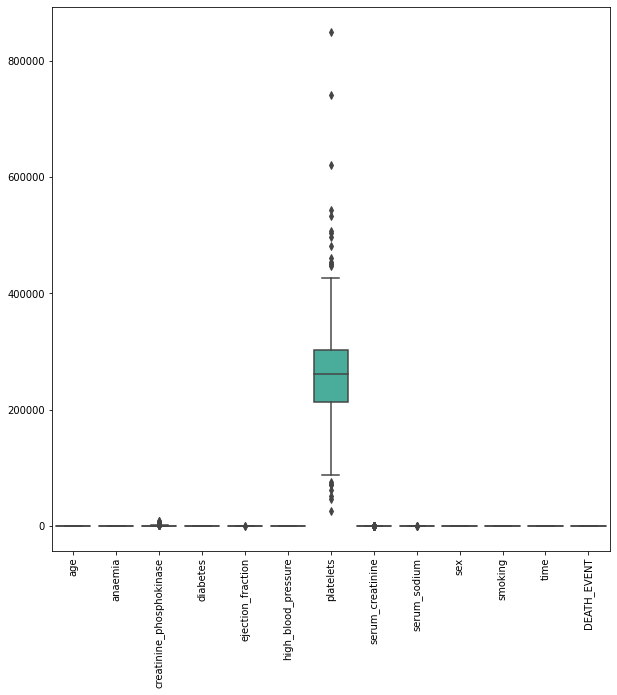

In [12]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.show()

if drop platelets

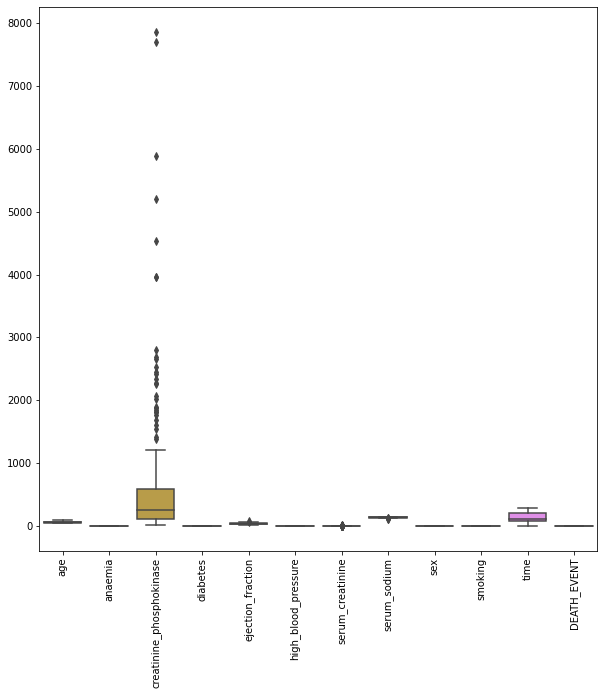

In [13]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = df.drop("platelets", axis = 1))
plt.xticks(rotation = 90)
plt.show()

### 2. Feature Engineering

In this dataset your output (Death) is categorical dataset and your inputs have both types (numerical and categorical)

+ Feature Selection



#### 2.1 Feature selections: 
Input: Categorical

Ouput: Categorical

Using Chi-square test - [tutorial](https://machinelearningmastery.com/feature-selection-with-categorical-data/)

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [49]:
outputs = np.expand_dims(df["DEATH_EVENT"].values, 1)
inputs_c = df[["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]].values

# check shape 
outputs.shape, inputs_c.shape

((299, 1), (299, 5))

In [57]:
fs = SelectKBest(score_func= chi2, k = 3)
fs.fit(inputs_c, outputs)

SelectKBest(k=3, score_func=<function chi2 at 0x7f1ebe70a0e0>)

In [58]:
fs.scores_

array([7.46593411e-01, 6.56814450e-04, 1.22153853e+00, 1.95626598e-03,
       3.23468288e-02])

Feature 0: 0.746593
Feature 1: 0.000657
Feature 2: 1.221539
Feature 3: 0.001956
Feature 4: 0.032347


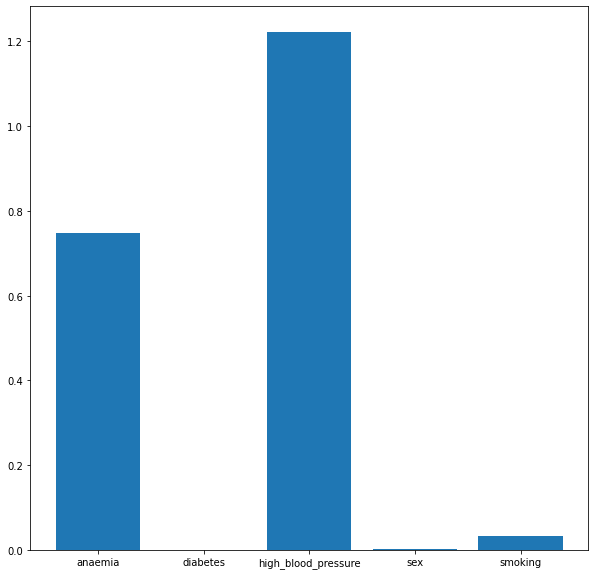

In [59]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize = (10, 10))
plt.bar(["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"], fs.scores_)
plt.show()

In [60]:
inputs_c_fs = fs.transform(inputs_c)

In [62]:
inputs_c_fs[:5]

array([[0, 1, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

choose 3 features anaemia, high_blood_pressure, smoking

Input: Numerical

Ouput: Categorical

Using ANOVA test - [tutorial](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

In [64]:
from sklearn.feature_selection import f_classif

In [68]:
#outputs = np.expand_dims(df["DEATH_EVENT"].values, 1)
outputs = df["DEATH_EVENT"].values
inputs_n = df[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]].values

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
inputs_n[:5]

array([[7.5000000e+01, 5.8200000e+02, 2.0000000e+01, 2.6500000e+05,
        1.9000000e+00, 1.3000000e+02, 4.0000000e+00],
       [5.5000000e+01, 7.8610000e+03, 3.8000000e+01, 2.6335803e+05,
        1.1000000e+00, 1.3600000e+02, 6.0000000e+00],
       [6.5000000e+01, 1.4600000e+02, 2.0000000e+01, 1.6200000e+05,
        1.3000000e+00, 1.2900000e+02, 7.0000000e+00],
       [5.0000000e+01, 1.1100000e+02, 2.0000000e+01, 2.1000000e+05,
        1.9000000e+00, 1.3700000e+02, 7.0000000e+00],
       [6.5000000e+01, 1.6000000e+02, 2.0000000e+01, 3.2700000e+05,
        2.7000000e+00, 1.1600000e+02, 8.0000000e+00]])

In [81]:
scaler = MinMaxScaler()
scaler.fit(inputs_n)
inputs_n = scaler.transform(inputs_n)
inputs_n[:5]

array([[0.63636364, 0.07131921, 0.09090909, 0.29082313, 0.15730337,
        0.48571429, 0.        ],
       [0.27272727, 1.        , 0.36363636, 0.28883262, 0.06741573,
        0.65714286, 0.00711744],
       [0.45454545, 0.01569278, 0.09090909, 0.16595951, 0.08988764,
        0.45714286, 0.01067616],
       [0.18181818, 0.01122735, 0.09090909, 0.22414838, 0.15730337,
        0.68571429, 0.01067616],
       [0.45454545, 0.01747895, 0.09090909, 0.36598376, 0.24719101,
        0.08571429, 0.01423488]])

In [82]:
fs = SelectKBest(score_func = f_classif, k = 5)
fs.fit(inputs_n, outputs)

SelectKBest(k=5)

Feature 0: 20.435946
Feature 1: 1.173259
Feature 2: 23.094063
Feature 3: 0.718880
Feature 4: 28.158492
Feature 5: 11.765331
Feature 6: 114.181264


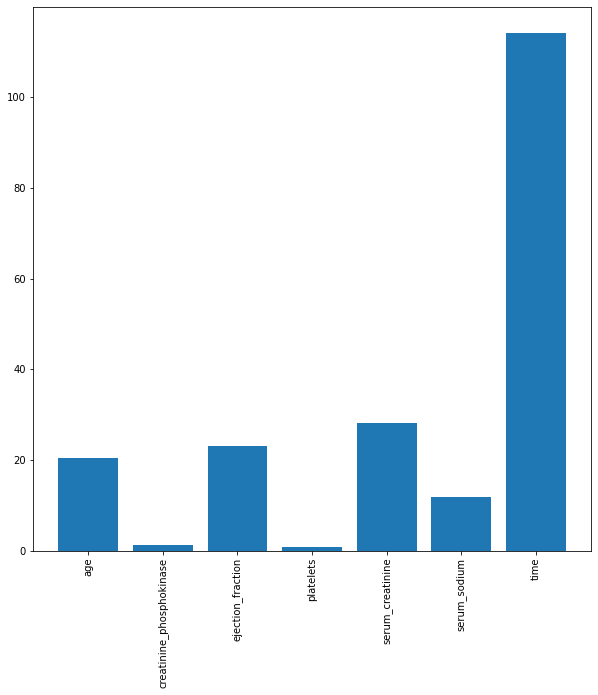

In [83]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize = (10, 10))
plt.bar(["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"], fs.scores_)
plt.xticks(rotation = 90)
plt.show()

In [84]:
inputs_n_fs = fs.transform(inputs_n)

In [86]:
inputs_n_fs.shape, inputs_n.shape

((299, 5), (299, 7))

Data after Features selections

In [87]:
inputs_n_fs.shape, inputs_c_fs.shape

((299, 5), (299, 3))

In [90]:
inputs = np.hstack([inputs_n_fs, inputs_c_fs])
inputs.shape

(299, 8)

In [104]:
outputs = df["DEATH_EVENT"].values
outputs.shape

(299,)

Train-val splits

In [92]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2, random_state = 42)

### 3. Create model KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### 3.1 Select best of k

Select range of k with min of k = 2 (almost cases) and max of k = sqrt(sample_size / 2) = sqrt(299 / 2) = 12.27

--> range of K (2, 12)

In [114]:
list_k = []
list_acc_score = []
for k in range (2,13): 
  list_k.append(k)
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  list_acc_score.append(score)
  print ("With k = %d --> the accuracy is %f" %(k, score))

With k = 2 --> the accuracy is 0.633333
With k = 3 --> the accuracy is 0.666667
With k = 4 --> the accuracy is 0.633333
With k = 5 --> the accuracy is 0.683333
With k = 6 --> the accuracy is 0.616667
With k = 7 --> the accuracy is 0.633333
With k = 8 --> the accuracy is 0.633333
With k = 9 --> the accuracy is 0.633333
With k = 10 --> the accuracy is 0.616667
With k = 11 --> the accuracy is 0.600000
With k = 12 --> the accuracy is 0.583333


**NOTE if we have two or more accuracy highest and similarity --> using this way** 


```
list_k = []
list_score_train = []
list_score_test = []
list_score_gap = []
for k in range (2,13):
  list_k.append(k)
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,y_train)
  score_train = accuracy_score(y_train, model.predict(X_train))
  score_test = accuracy_score(y_test, model.predict(X_test))
  gap = abs(score_train - score_test)
  list_score_train.append(score_train)
  list_score_test.append(score_test)
  list_score_gap.append(gap)
  print ("With k = %d --> the gap is %f" %(k, gap))
```


In this case we choose the value of k with hights accuracy --> k = 5 with acc = 0.68

#### 3.2 Final model

In [120]:
best_k = list_k[list_acc_score.index(max(list_acc_score))]
best_k

5

In [121]:
model = KNeighborsClassifier(n_neighbors = best_k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [130]:
y_pred = model.predict(X_test)

In [123]:
df = pd.DataFrame({"Actual": y_test, 
                   "Predicted": y_pred})

In [124]:
df.head()

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0


In [126]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))

print(f"acc_train = {acc_train}")
print(f"acc_test = {acc_test}")

acc_train = 0.8451882845188284
acc_test = 0.6833333333333333


### 4. Save model

In [127]:
import pickle

In [128]:
pickle_file = "KNN_Classification_model.pkl"
with open (pickle_file, "wb") as file:
  pickle.dump(model, file)

In [133]:
!ls

1.How-to-connect-Google-Colab
2.KNN_Classification_Structure_Data.KNN_Classification
Dataset
KNN_Classification_model.pkl


### 5. Load model

In [129]:
pkl_filename = "KNN_Classification_model.pkl"
with open(pkl_filename, "rb") as file:
  knn_model = pickle.load(file)

In [131]:
y_pred = knn_model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 1, 0])